In [7]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
import matplotlib.pyplot as plt

(28, 28)


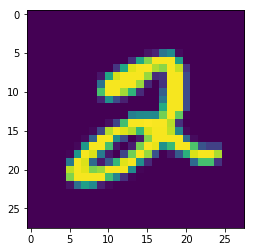

In [8]:
#splitting data into trainig and testing 
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

# just to plot an image 
import matplotlib.image as mpimg
print(xtrain[1].shape)
imgplot = plt.imshow(xtrain[5])
plt.show()

In [9]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1]*xtrain.shape[2])
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1]*xtest.shape[2])
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [10]:
# data Normalisation
xtrain=xtrain/255
xtest=xtest/255


In [11]:
#  convert  to one hot encoding
print(ytrain[9])
print(ytest[9])
ytrain=np_utils.to_categorical(ytrain,10)
ytest=np_utils.to_categorical(ytest,10)
print(ytrain[9])
print(ytest[9])

4
9
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,  Dropout
from keras.initializers import RandomNormal


In [68]:
model = Sequential()
model.add(Dense(32,input_dim=784,activation='sigmoid'))
model.add(Dense(16,activation='sigmoid'))

model.add(Dense(10,activation='softmax'))

In [69]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
history=model.fit(xtrain,ytrain,batch_size=64,epochs=15,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 59us/sample - loss: 1.1879 - accuracy: 0.7216 - val_loss: 0.5542 - val_accuracy: 0.8937
Epoch 2/15
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4132 - accuracy: 0.9046 - val_loss: 0.3216 - val_accuracy: 0.9193
Epoch 3/15
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2805 - accuracy: 0.9258 - val_loss: 0.2501 - val_accuracy: 0.9331
Epoch 4/15
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2249 - accuracy: 0.9383 - val_loss: 0.2129 - val_accuracy: 0.9419
Epoch 5/15
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1912 - accuracy: 0.9471 - val_loss: 0.1897 - val_accuracy: 0.9474
Epoch 6/15
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1684 - accuracy: 0.9528 - val_loss: 0.1716 - val_accuracy: 0.9506
Epoch 7/15
60000/60000 [==============================] 

In [71]:
score=model.evaluate(xtest,ytest,verbose=1)
print(score[0])
print(score[1])

10000/10000 [==============================] - 0s 46us/sample - loss: 0.1241 - accuracy: 0.9627
0.12405707200989127
0.9627


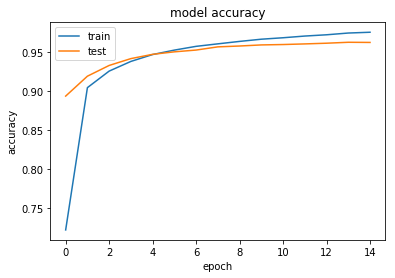

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

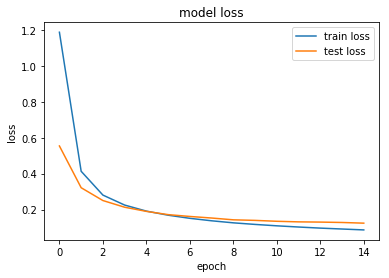

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()